# Import libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tfimm

import matplotlib.pyplot as plt
import pandas as pd

## Path

In [2]:
import pathlib
dataset = pathlib.Path(r"C:\Users\lulu5\Documents\echantillon_1")
data_dir_train = pathlib.Path(r"C:\Users\lulu5\Documents\train")
data_dir_test = pathlib.Path(r"C:\Users\lulu5\Documents\test")
#Nombre images
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_train, image_count_test)

2072 245


In [4]:
batch_size = 64
img_height = 224
img_width = 224
number_class = 1081

## Data augmentation

In [5]:
TFs = {#'height_shift_range':  .5,
       "horizontal_flip": True,
       "vertical_flip": True,
       "rotation_range": 30,
       "featurewise_std_normalization": True,
       "brightness_range": (1, 1.5),
       "shear_range":0.2
       # other transformation your want
       # ...
       }
datagen = ImageDataGenerator(**TFs, validation_split=0.2)

C:\Users\lulu5\anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:349: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


In [6]:
train_generator = datagen.flow_from_directory(
    dataset,
    color_mode="rgb",
    batch_size=batch_size,
    subset = "training",
    target_size=(img_height, img_width),
    shuffle=True,
    class_mode='binary')

validation_generator = datagen.flow_from_directory(
    dataset,
    color_mode="rgb",
    batch_size=batch_size,
    subset = "validation",
    target_size=(img_height, img_width),
    shuffle=True,
    class_mode='binary')

Found 12832 images belonging to 1081 classes.
Found 2771 images belonging to 1081 classes.


In [7]:
batch_x, batch_y = next(train_generator)

C:\Users\lulu5\anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\lulu5\anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


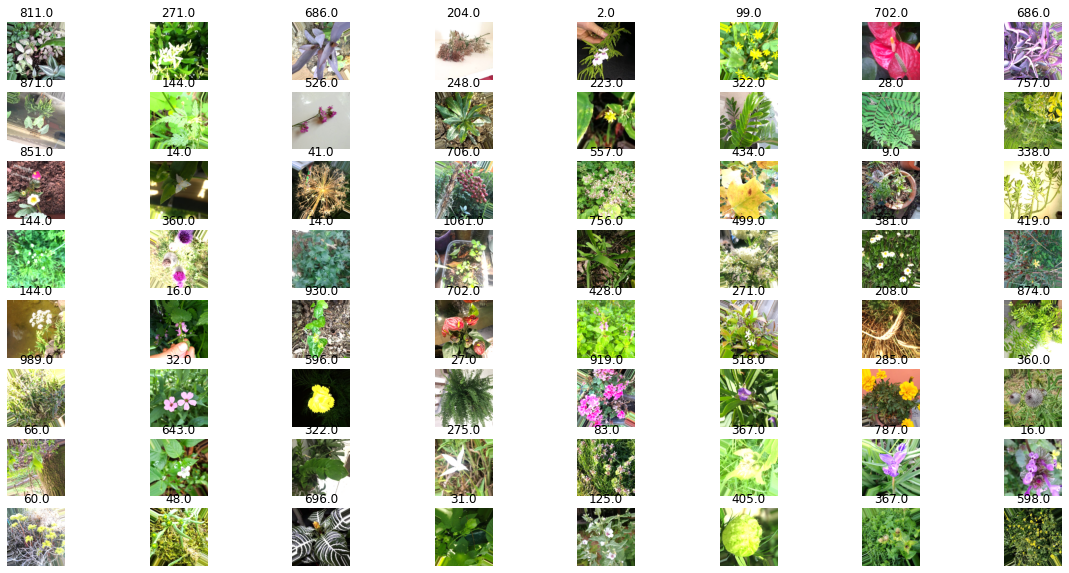

In [9]:
fig, axes = plt.subplots(nrows=4, ncols=8, figsize=(20, 10))

for i in range(batch_x.shape[0]):
    plt.subplot(8, 8, i+1)
    image = batch_x[i].astype('uint8')
    label = batch_y[i]
    plt.imshow(image)
    plt.title(label)
    plt.axis('off')


# Modèle

In [10]:
def plot_hist(history):
    #Accuracy
    plt.subplot(131)
    plt.plot(history.history['accuracy']    ,'--',     label='accuracy', c='g')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.0, 1.05])
    #sparse_top_k_categorical_accuracy
    plt.subplot(132)
    plt.plot(history.history['sparse_top_k_categorical_accuracy']  ,'--'  ,      label='accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy top-5')
    plt.ylim([0.0, 1.05])
    #Loss
    plt.subplot(133)
    plt.plot(history.history['loss']    ,'--',     label='loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

def plot_hist_plus(history):
    plt.subplot(131)
    plt.plot(history.history['accuracy']    ,'--',     label='accuracy', c='g')
    plt.plot(history.history['val_accuracy'],     label = 'val_accuracy', c='g')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.0, 1.05])
    plt.subplot(132)
    plt.plot(history.history['sparse_top_k_categorical_accuracy']  ,'--'  ,      label='accuracy')
    plt.plot(history.history['val_sparse_top_k_categorical_accuracy'],      label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy top-5')
    plt.ylim([0.0, 1.05])
    plt.subplot(133)
    plt.plot(history.history['loss']    ,'--',     label='loss')
    plt.plot(history.history['val_loss'],     label = 'val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

## Restnet

In [13]:
train_generator.batch_size

64

In [12]:
batch_size

train_generator = train_generator.cache().shuffle(1000).prefetch(buffer_size=batch_size)
validation_generator = validation_generator.cache().prefetch(buffer_size=batch_size)

AttributeError: 'DirectoryIterator' object has no attribute 'cache'

In [159]:
model_resnet = tf.keras.applications.resnet50.ResNet50(
    include_top=True, weights=None, input_tensor=None,
    input_shape=None, pooling=None, classes=number_class)

In [161]:
model_resnet.compile(optimizer="Adam", 
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy', 'sparse_top_k_categorical_accuracy'])

In [162]:
history = model_resnet.fit(train_generator, validation_data=validation_generator,epochs=10,batch_size=batch_size, verbose=1,
steps_per_epoch=3, validation_steps=1)

C:\Users\lulu5\anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\lulu5\anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10


C:\Users\lulu5\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


3/3 [==============================] - 65s 19s/step - loss: 9.3801 - accuracy: 0.0000e+00 - sparse_top_k_categorical_accuracy: 0.0208 - val_loss: 248.7395 - val_accuracy: 0.0000e+00 - val_sparse_top_k_categorical_accuracy: 0.0000e+00
Epoch 2/10
3/3 [==============================] - 49s 17s/step - loss: 9.8237 - accuracy: 0.0000e+00 - sparse_top_k_categorical_accuracy: 0.0312 - val_loss: 6339.9629 - val_accuracy: 0.0000e+00 - val_sparse_top_k_categorical_accuracy: 1.0000
Epoch 3/10
3/3 [==============================] - 48s 17s/step - loss: 9.0661 - accuracy: 0.0000e+00 - sparse_top_k_categorical_accuracy: 0.0208 - val_loss: 56538.0312 - val_accuracy: 0.0000e+00 - val_sparse_top_k_categorical_accuracy: 1.0000
Epoch 4/10
3/3 [==============================] - 47s 16s/step - loss: 7.2739 - accuracy: 0.0104 - sparse_top_k_categorical_accuracy: 0.0312 - val_loss: 108240.3047 - val_accuracy: 0.0000e+00 - val_sparse_top_k_categorical_accuracy: 1.0000
Epoch 5/10
3/3 [=========================

In [163]:
history.history

{'loss': [9.3800687789917,
  9.823681831359863,
  9.066107749938965,
  7.273939609527588,
  7.469917297363281,
  7.180795192718506,
  6.4623541831970215,
  7.1217474937438965,
  7.4866943359375,
  6.780348300933838],
 'accuracy': [0.0,
  0.0,
  0.0,
  0.010416666977107525,
  0.0,
  0.0,
  0.010416666977107525,
  0.010416666977107525,
  0.010416666977107525,
  0.010416666977107525],
 'sparse_top_k_categorical_accuracy': [0.02083333395421505,
  0.03125,
  0.02083333395421505,
  0.03125,
  0.03125,
  0.0520833320915699,
  0.03125,
  0.03125,
  0.010416666977107525,
  0.03125],
 'val_loss': [248.73953247070312,
  6339.962890625,
  56538.03125,
  108240.3046875,
  59073.2578125,
  34840.171875,
  92492.8828125,
  83568.28125,
  21231.12109375,
  922.8253173828125],
 'val_accuracy': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 'val_sparse_top_k_categorical_accuracy': [0.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.875]}

In [164]:
pd.DataFrame(history.history).to_json("lulu.json")

### Resnet évolué

In [139]:
from keras.models import Model, Sequential
from keras.layers import Dense,Dropout

model_V1bis = Sequential()
extracted_layer= Model(inputs = model.input, outputs=model.get_layer("avg_pool").output, name="model_V1")
extracted_layer.trainable = False
model_V1bis.add(extracted_layer),
model_V1bis.add(Dense(1024, activation = 'relu'))
model_V1bis.add(Dropout(0.2))
model_V1bis.add(Dense(512, activation = 'relu'))
model_V1bis.add(Dense(number_class, activation = 'softmax'))

In [145]:
#model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics='acc')
model_V1bis.compile(optimizer="Adam", 
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy', 'sparse_top_k_categorical_accuracy'])

In [146]:
history = model_V1bis.fit(train_generator, validation_data=validation_generator,epochs=10,batch_size=batch_size, verbose=1,
steps_per_epoch=3, validation_steps=1)

C:\Users\lulu5\anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\lulu5\anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10


C:\Users\lulu5\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


3/3 [==============================] - 30s 10s/step - loss: 6.7792 - accuracy: 0.0000e+00 - sparse_top_k_categorical_accuracy: 0.0000e+00 - val_loss: 6.2930 - val_accuracy: 0.0000e+00 - val_sparse_top_k_categorical_accuracy: 0.0312
Epoch 2/10
3/3 [==============================] - 21s 8s/step - loss: 6.4920 - accuracy: 0.0000e+00 - sparse_top_k_categorical_accuracy: 0.0312 - val_loss: 6.7547 - val_accuracy: 0.0000e+00 - val_sparse_top_k_categorical_accuracy: 0.0000e+00
Epoch 3/10
3/3 [==============================] - 20s 7s/step - loss: 6.4795 - accuracy: 0.0104 - sparse_top_k_categorical_accuracy: 0.0521 - val_loss: 6.4559 - val_accuracy: 0.0000e+00 - val_sparse_top_k_categorical_accuracy: 0.0312
Epoch 4/10
3/3 [==============================] - 17s 6s/step - loss: 6.5430 - accuracy: 0.0104 - sparse_top_k_categorical_accuracy: 0.0312 - val_loss: 6.3665 - val_accuracy: 0.0000e+00 - val_sparse_top_k_categorical_accuracy: 0.0000e+00
Epoch 5/10
3/3 [==============================] - 18s 

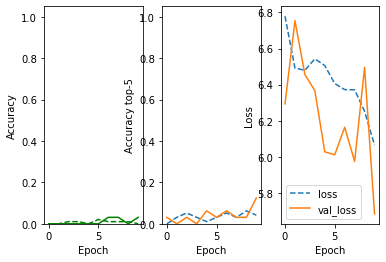

In [147]:
plot_hist_plus(history)

In [154]:
def read_function(filename, label):
    image  = tf.image.decode_jpeg(tf.io.read_file(filename), channels=3)
    image = tf.image.resize(image, (img_height,img_width), method= tf.image.ResizeMethod.BILINEAR, preserve_aspect_ratio=False)
    return image, label

In [149]:
#image
img = pathlib.Path(r"C:\Users\lulu5\Documents\test\9\1dfc7051f1d2996d89fd1d6f81d6c5042b48e165.jpg")
img = tf.io.decode_jpeg(img, channels=3)

ValueError: Attempt to convert a value (WindowsPath('C:/Users/lulu5/Documents/test/9/1dfc7051f1d2996d89fd1d6f81d6c5042b48e165.jpg')) with an unsupported type (<class 'pathlib.WindowsPath'>) to a Tensor.

In [ ]:
mobile_model.predict()

In [149]:
#pd.DataFrame(history.history).to_json("lulu.json")

In [155]:
#model.save("model_V1.h5")

## Modèle tftimm

In [159]:
model = tfimm.create_model("vit_tiny_patch16_224", dtype="float32", pretrained=False)

In [129]:
model.compile(optimizer="Adam", 
        loss=SparseCategoricalFocalLoss(gamma=5),
        metrics=['accuracy', 'sparse_top_k_categorical_accuracy'])

In [165]:
tfimm.list_models(pretrained=True)

['cait_m36_384',
 'cait_m48_448',
 'cait_s24_224',
 'cait_s24_384',
 'cait_s36_384',
 'cait_xs24_384',
 'cait_xxs24_224',
 'cait_xxs24_384',
 'cait_xxs36_224',
 'cait_xxs36_384',
 'convmixer_768_32',
 'convmixer_1024_20_ks9_p14',
 'convmixer_1536_20',
 'convnext_base',
 'convnext_base_384_in22ft1k',
 'convnext_base_in22ft1k',
 'convnext_base_in22k',
 'convnext_large',
 'convnext_large_384_in22ft1k',
 'convnext_large_in22ft1k',
 'convnext_large_in22k',
 'convnext_small',
 'convnext_tiny',
 'convnext_xlarge_384_in22ft1k',
 'convnext_xlarge_in22ft1k',
 'convnext_xlarge_in22k',
 'deit_base_distilled_patch16_224',
 'deit_base_distilled_patch16_384',
 'deit_base_patch16_224',
 'deit_base_patch16_384',
 'deit_small_distilled_patch16_224',
 'deit_small_patch16_224',
 'deit_tiny_distilled_patch16_224',
 'deit_tiny_patch16_224',
 'ecaresnet26t',
 'ecaresnet50d',
 'ecaresnet50t',
 'ecaresnet101d',
 'ecaresnet269d',
 'ecaresnetlight',
 'gmixer_12_224',
 'gmixer_24_224',
 'gmlp_b16_224',
 'gmlp_s16

In [163]:
hist = model.fit(train_generator)

KeyboardInterrupt: 

In [ ]:
tfimm.list_models()

['cait_m36_384',
 'cait_m48_448',
 'cait_s24_224',
 'cait_s24_384',
 'cait_s36_384',
 'cait_xs24_384',
 'cait_xxs24_224',
 'cait_xxs24_384',
 'cait_xxs36_224',
 'cait_xxs36_384',
 'convmixer_768_32',
 'convmixer_1024_20_ks9_p14',
 'convmixer_1536_20',
 'convnext_base',
 'convnext_base_384_in22ft1k',
 'convnext_base_in22ft1k',
 'convnext_base_in22k',
 'convnext_large',
 'convnext_large_384_in22ft1k',
 'convnext_large_in22ft1k',
 'convnext_large_in22k',
 'convnext_small',
 'convnext_tiny',
 'convnext_xlarge_384_in22ft1k',
 'convnext_xlarge_in22ft1k',
 'convnext_xlarge_in22k',
 'deit_base_distilled_patch16_224',
 'deit_base_distilled_patch16_384',
 'deit_base_patch16_224',
 'deit_base_patch16_384',
 'deit_small_distilled_patch16_224',
 'deit_small_patch16_224',
 'deit_tiny_distilled_patch16_224',
 'deit_tiny_patch16_224',
 'ecaresnet26t',
 'ecaresnet50d',
 'ecaresnet50t',
 'ecaresnet101d',
 'ecaresnet269d',
 'ecaresnetlight',
 'gmixer_12_224',
 'gmixer_24_224',
 'gmlp_b16_224',
 'gmlp_s16

In [31]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = train_ds.class_names
print(class_names
)

NameError: name 'data_dir' is not defined